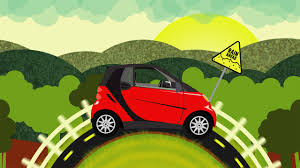

## Introduction

This project aims to study data from a company called Zuber, a new transportation app. This project looks at web data gathered from Chicago in November of 2017. The goal of this project is to understand passenger preferences and the impact of external factors on rides.

This will be done by:
1) Exploring collected data gathered from internet sources and making sure data contains no errors
2) Explore different neighborhood and taxi company preferences
3) Test a Hypothesis regarding weather conditions and their impact on driving routes

## Clean Data Set

In [12]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy import stats as st

In [13]:
#import files and look at general information
file_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
display(file_1.info())
file_2 = pd.read_csv('/datasets/project_sql_result_04.csv')
display(file_2.info())
file_3 = pd.read_csv('/datasets/project_sql_result_07.csv')
display(file_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

Neither of these data frames contain missing values, so no further analysis will be done to look for or correct them.

--> Look at data types for file 1 and correct if need be 

The name of the companies are object type which makes sense for word values. the trip amount is in integer type which makes sense for numerical data. As it stands no data type needs to be changed.


In [14]:
#look for duplicates in file 1
duplicate_count = file_1.duplicated().sum()
print(f'The number of duplicated rows in file 1 is {duplicate_count}')

The number of duplicated rows in file 1 is 0


In [15]:
#look at data types for file 2 and correct if need be 
#change average trips to an integer, as we are counting total number of average trips
file_2['average_trips'] = file_2['average_trips'].astype(int)
display(file_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


None

In [16]:
#look for duplicate values in file 2
duplicate_count = file_2.duplicated().sum()
print(f'The number of duplicated rows in file 2 is {duplicate_count}')

The number of duplicated rows in file 2 is 0


In [17]:
#look at data types for file 3 and correct if need be 
display(file_3.info())
#convert start_ts to datetime
file_3['start_ts'] = pd.to_datetime(file_3['start_ts'])
display(file_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


None

In [18]:
#look for duplicate values in file 3
duplicate_count = file_3.duplicated().sum()
print(f'The number of duplicated rows in file 3 is {duplicate_count}')

#drop duplicates
file_3 = file_3.drop_duplicates().reset_index()
print(file_3.info())


The number of duplicated rows in file 3 is 197
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               871 non-null    int64         
 1   start_ts            871 non-null    datetime64[ns]
 2   weather_conditions  871 non-null    object        
 3   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 27.3+ KB
None


## Exploratory Data Analysis

1) Identify the top 10 neighborhoods in terms of drop-offs

In [19]:
#use file_2 df

#sort results in descending order
file_2_top= file_2.sort_values(by='average_trips', ascending=False)
#isolate top 10 neighborhoods
file_2_top_10 = file_2_top.head(10)
display(file_2_top_10)



,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


3) Make graph: top 10 neighborhoods by number of dropoffs


In [20]:
fig_top_10 = px.bar(file_2_top_10, x='dropoff_location_name', y='average_trips', 
             title="Graph 1: Average Trips by Dropoff Location", 
             labels={'dropoff_location_name': 'Dropoff Location', 'average_trips': 'Average Trips'})

# Show the graph
fig_top_10.show()

2) Make graph: taxi companies and number of rides

In [21]:
fig = px.bar(file_1, x='company_name', y='trips_amount', 
             title="Graph 2: Trip Amount by Company", 
             labels={'company_name': 'Company Name', 'trips_amount': 'Number of Trips'})

# Show the graph
fig.show()

## EDA Conclusions

The neighborhood with the highest number of rides according to the data is the Loop neighborhood as can be seen on Graph 1. Of the top 10, Sheffield and DePaul are the lowest number of average trips. It would be interesting to gather more information as to why these neighborhoods have the highest number of trips (income, app popularity, accessibility to other areas, other public transportation, etc) in order to better understand user patterns.

The taxi company with the highest number of trips is the Flash Cab Company, while the company with the least number of trips is the Felman Corps. Further information such as why these patterns are seen would be helpful to see higher numbers of trips for all companies. 

## Hypothesis Testing
Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decide where to set the significance level (alpha) on your own.

Explain:

how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why


Но-Average duration of rides on rainy Saturdays and not rainy Saturdays are the same:because null hypothesis always suggest equality

Н1—Average duration of rides on rainy Saturdays and not rainy Saturdays are different. 

*I am choosing to set alpha at 0.05 for both of these tests because it is a commonly used threshold.

This will use a t-test to compare two different population means


In [22]:
display(file_3.head())
#sort the data into rainy vs not rainy and isolate data being used
file_3_bad = file_3[file_3['weather_conditions']=='Bad']['duration_seconds']
file_3_good = file_3[file_3['weather_conditions'] == 'Good']['duration_seconds']

#obtain general statistics about populations
display(file_3_bad.describe())
display(file_3_good.describe())

#set alpha value
alpha=0.05

#perform t-test
results = st.ttest_ind(file_3_bad, file_3_good)

#print results
print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

,index,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0


count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64

count     723.000000
mean     2032.253112
std       773.444860
min         0.000000
25%      1435.500000
50%      1883.000000
75%      2491.500000
max      7440.000000
Name: duration_seconds, dtype: float64

T-statistic: 5.427957689754561
P-value: 7.397770692813658e-08


The large t-statistics value indicates a large difference in average ride duration between rainy and not rainy days.

The p-value is less than our alpha value of 0.05. Because of this we can reject the null hypothesis and accept the alternative hypothesis that the difference between average ride duration on rainy and not rainy days is statistically signifigant.

## Conclusion

While looking at the Zuber data, it is clear that the Loop neighborhood has the highest overall number of trips, the Flash Cab company has the highest number of rides, and that rides are overall longer on rainy days. It seems that passengers from areas such as Loop, River North, and Streeterville prefer to use these services and riders tend to use the Flash Cab and Taxi Affiliation Services Companies. Weather conditions also seem to impact rides in Chicago.

Many avenues can be taken to improve this study and gain more insight into client behaviors. Understanding the demographics in each area, prices for rides, availability of public transport, and other other external conditions such as road maintanence can give even 